# Circular Aperture Antennas

REFERENCE

Begin by getting the library path

In [11]:
import lib_path

Set the operating frequency (Hz) and the aperture radius (m)

In [12]:
frequency = 1e9

radius = 0.5

Set up the theta and phi arrays using the `meshgrid` and `linspace` routines from `scipy`

In [13]:
from scipy import linspace, meshgrid, finfo

from scipy.constants import pi


n = 200

m = int(n/4)

theta, phi = meshgrid(linspace(finfo(float).eps, 0.5 * pi, n), linspace(finfo(float).eps, 2.0 * pi, n))

Calculate the antenna parameters and antenna pattern for the circular uniform ground plane antenna OR the circular TE11 ground plane antenna

In [14]:
from Libs.antenna.aperture import circular_uniform_ground_plane, circular_te11_ground_plane


'''
half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = circular_uniform_ground_plane.beamwidth(radius, frequency)

directivity = circular_uniform_ground_plane.directivity(radius, frequency)

sidelobe_level_eplane = circular_uniform_ground_plane.side_lobe_level()

sidelobe_level_hplane = sidelobe_level_eplane

_, et, ep, _, _, _ = circular_uniform_ground_plane.far_fields(radius, frequency, 1e9, theta, phi)
'''



half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = circular_te11_ground_plane.beamwidth(radius, frequency)

directivity = circular_te11_ground_plane.directivity(radius, frequency)

sidelobe_level_eplane = circular_te11_ground_plane.side_lobe_level()

sidelobe_level_hplane = sidelobe_level_eplane

_, et, ep, _, _, _ = circular_te11_ground_plane.far_fields(radius, frequency, 1e9, theta, phi)

Display the antenna parameters for the circular aperture antenna

In [15]:
print('Sidelobe level E-plane', (sidelobe_level_eplane))

print('Sidelob level H-plane', (sidelobe_level_hplane))

print('Directivity', (directivity))

Sidelobe level E-plane (-17.6, -26.2)
Sidelob level H-plane (-17.6, -26.2)
Directivity 91.7566976055009


Create the U-V coordinates for displaying the antenna pattern

In [16]:
from scipy import sin, cos

uu = sin(theta) * cos(phi)

vv = sin(theta) * sin(phi)

Calculate the normalized electric field magnitude

In [17]:
from scipy import sqrt, amax

e_mag = sqrt(abs(et * et + ep * ep))

e_mag /= amax(e_mag)

Create the color plot using the `matplotlib` routines

Text(0, 0.5, 'V (sines)')

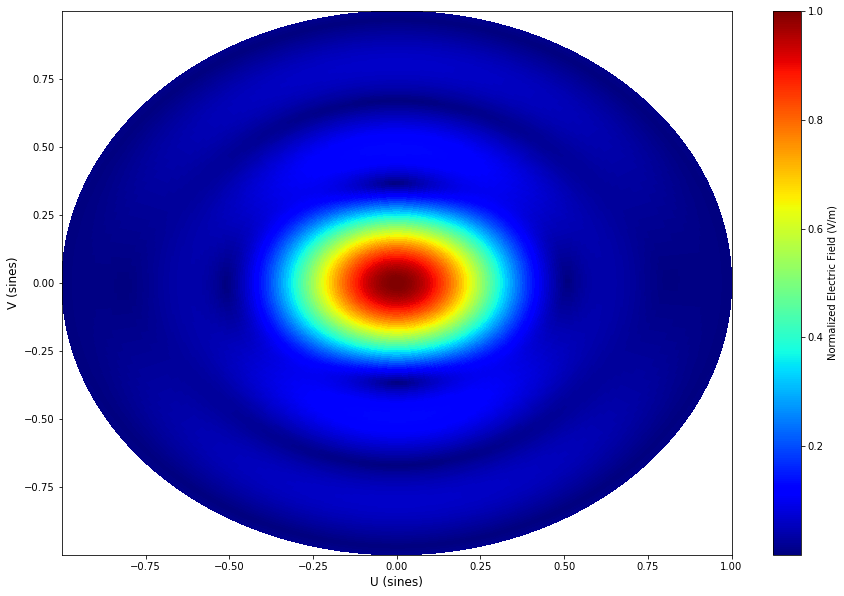

In [18]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Set up the axes

fig, axes1 = plt.subplots()

im = axes1.pcolor(uu, vv, e_mag, cmap="jet")

cbar = fig.colorbar(im, ax=axes1, orientation='vertical')

cbar.set_label("Normalized Electric Field (V/m)", size=10)


# Set the x- and y-axis labels

plt.xlabel("U (sines)", size=12)

plt.ylabel("V (sines)", size=12)


# Set the plot title

plt.title('Circular Aperture Antenna Pattern', size=14)

Create the contour plot using the `matplotlib` routines

Text(0, 0.5, 'V (sines)')

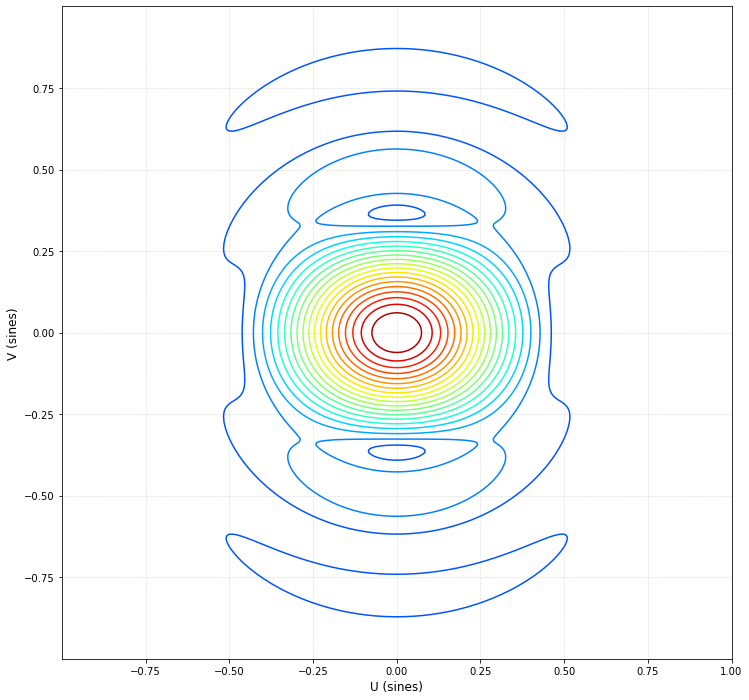

In [19]:
# Set the figure size

plt.rcParams["figure.figsize"] = (12, 12)

plt.contour(uu, vv, e_mag, 20, cmap="jet", vmin=-0.2, vmax=1.0)

plt.grid(linestyle=':', linewidth=0.5)


# Set the x- and y-axis labels

plt.xlabel("U (sines)", size=12)

plt.ylabel("V (sines)", size=12)


# Set the plot title

plt.title('Circular Aperture Antenna Pattern', size=14)

Create the line plot using the `matplotlib` routines

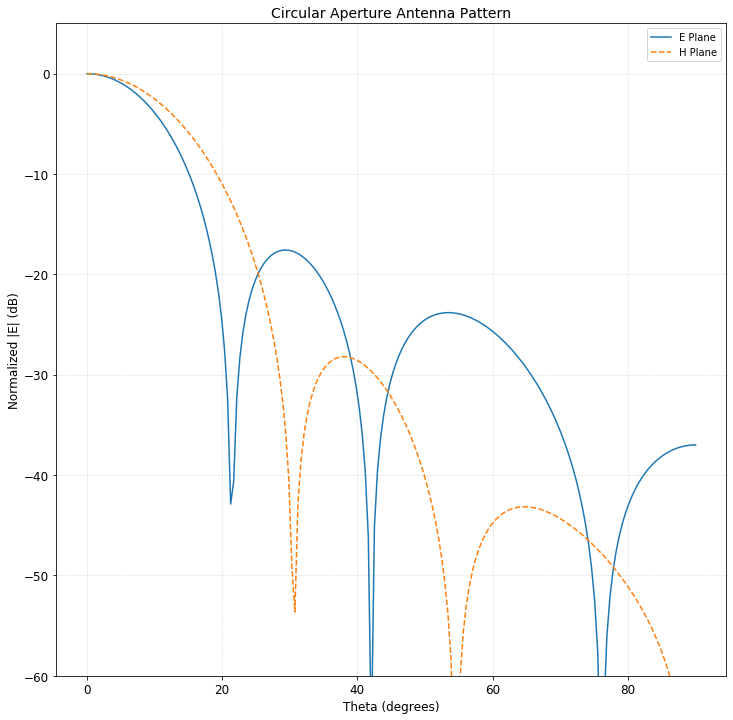

In [20]:
from scipy import degrees, log10


plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[m]), '', label='E Plane')

plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[0]), '--', label='H Plane')


# Set the y axis limit

plt.ylim(-60, 5)



# Set the x and y axis labels

plt.xlabel("Theta (degrees)", size=12)

plt.ylabel("Normalized |E| (dB)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Place the legend

plt.legend(loc='upper right', prop={'size': 10})



# Set the plot title

plt.title('Circular Aperture Antenna Pattern', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)